# Medical Appoinment Case Study
#### Exploring and getting insights of the data set having data of appointments of patients having different health related problems such as diabetes, hypertension etc 

## Introduction



#### The recent raise in health related issues has made it fundamental that everyone one has easy access to health care but its been discoved that despite provision of access patient may or may not show up for their appointments leading to hospital incuring losses on operating cost as salaries will be paid wether or not patient visit the hospitals as expected. This report tries to analyse the reason why patients dont show up for their appointments after scheduling one and providing possible solutions the hospitals can consider in improvoing their revenue.

#### Dataset used for this project was collected from Kaggle the dataset contains 110k medical appointments in Brazil, collected in May/June 2016 and its focused on characteristics of patients as well as their presence or absence from scheduled medical appointments. The dataset is made up of 14 unique variables.


## Overview


#### Variables in this dataset includes (PatientId, AppointmentID, Gender, ScheduledDay, AppointmentDay, Age, Hipertension, Diabetes, Alcoholism,  Handcap, SMS_received, Neighbourhood, Scholarship and No-show ). This analysis will be done using the No-show variable as our dependent variable while other variables will be used as independent varaibles.

#### Identifying factors responsible to no-show will definitely help Hospital better determine types of scheduled appointments to plan for and provide incentives that enables patient show up for their appointments.



#### This Project will be providing insights into the following qustions:
* What percentage of people showed up compared to those that didnt?

* Why Are People Not Showing Up?

* Does scholarship affect patient ability to show up?

* Does SMS alert impacts patient availability for their appointment?

* Is there any relationship between distance from patient neighbourhood to the hospital and their showing up for appointments?

* whats the time difference between a patient schedule date and his appointment date. What impact does this have on the patient ability to show up?

* Is there any relationship between patient age and their ability to show up?

* Does gender play any role in patient missing their appointment?

In [1]:
# importing all required library
import numpy as np, pandas as pd, seaborn as sns, matplotlib.pyplot as plt

In [2]:
base_data = pd.read_csv("Data.csv")  # reading and importing data
base_data.head() # Reading the datasets first five rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [3]:
base_data.tail() # Reading the datasets last five rows

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110522,2.572134e+12,5651768,F,2016-05-03T09:15:35Z,2016-06-07T00:00:00Z,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,3.596266e+12,5650093,F,2016-05-03T07:27:33Z,2016-06-07T00:00:00Z,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [4]:
base_data.shape # this functions gives the size of the data set 

(110527, 14)

##### There are 110527 rows and 14 columnns in the dataset

In [5]:
base_data.info() # for checking the data types and column names 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


### The datatype of the column "ScheduledDay" and "AppointmentDay" is not absolute so changing its format from 2016-04-29T18:38:08Z	 to 2016-04-29

In [6]:
#modifying the date and time into standard form
base_data['ScheduledDay'] = pd.to_datetime(base_data['ScheduledDay']).dt.date.astype('datetime64[ns]')
base_data['AppointmentDay'] = pd.to_datetime(base_data['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [7]:
base_data.info()
## checking again

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hipertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handcap         110527 non-null  int64         
 12  SMS_received    110527 non-null  int64         
 13  No-show         110527 non-null  object        
dtypes: datetime64[ns](2), float64(1), in

In [8]:
base_data.head()
# now the date is in correct format which is yyyy-mm-dd

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


for the schedule day and appointment day storing the weekdays only into a variable 

In [9]:
# 5 is Saturday, 6 is Sunday 

base_data['sch_weekday'] = base_data['ScheduledDay'].dt.dayofweek

In [10]:
base_data['app_weekday'] = base_data['AppointmentDay'].dt.dayofweek

In [11]:
base_data['sch_weekday'].value_counts()

1    26168
2    24262
0    23085
4    18915
3    18073
5       24
Name: sch_weekday, dtype: int64

In [12]:
base_data['app_weekday'].value_counts()

2    25867
1    25640
0    22715
4    19019
3    17247
5       39
Name: app_weekday, dtype: int64

### Correcting column names

In [13]:
base_data.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show',
       'sch_weekday', 'app_weekday'],
      dtype='object')

#### Renaming all the columns

In [14]:
#changing the name of some cloumns
base_data= base_data.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show': 'NoShow'})

In [15]:
base_data.columns # corrected now

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'NoShow',
       'sch_weekday', 'app_weekday'],
      dtype='object')

In [16]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

## Droping Columns
#### droping some column which are not important for our study since these columns give unnecessary details like in Patient Id or appointment ID and neighbourhood of the pateint is extra info

# dropping some columns which have no significance
base_data.drop(['PatientId', 'AppointmentID', 'Neighbourhood'], axis=1, inplace=True)

In [17]:
base_data.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,NoShow,sch_weekday,app_weekday
0,2.987250e+13,5642903,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,4,4
1,5.589978e+14,5642503,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,4,4
2,4.262962e+12,5642549,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,4,4
3,8.679512e+11,5642828,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,4,4
4,8.841186e+12,5642494,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,4,4


In [18]:
base_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  float64       
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  NoShow          110527 non-null  object        
 14  sch_weekday     110527 non-null  int

In [19]:
base_data.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,sch_weekday,app_weekday
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.851955,1.858243
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,1.378520,1.371672
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,3.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,5.000000,5.000000


Note- Mean age is about 37 years, minimum was written as -1 which we need to correct as there might be false values.

### Plotting No Show  

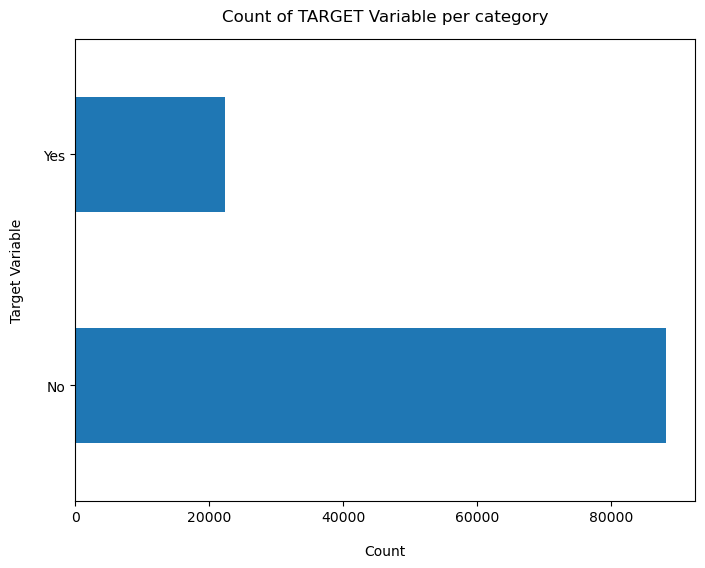

In [20]:
base_data['NoShow'].value_counts().plot(kind='barh', figsize=(8, 6))
plt.xlabel("Count", labelpad=14)
plt.ylabel("Target Variable", labelpad=14)
plt.title("Count of TARGET Variable per category", y=1.02);

In [21]:
# calculating the % of appointments where the patient arrived or not 
100*base_data['NoShow'].value_counts()/len(base_data['NoShow'])

No     79.806744
Yes    20.193256
Name: NoShow, dtype: float64

## The percentage of patients who were absent on there appointmnet date is 79.8

In [22]:
base_data['NoShow'].value_counts()

No     88208
Yes    22319
Name: NoShow, dtype: int64

In [23]:
base_data.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay         111
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hypertension           2
Diabetes               2
Alcoholism             2
Handicap               5
SMSReceived            2
NoShow                 2
sch_weekday            6
app_weekday            6
dtype: int64

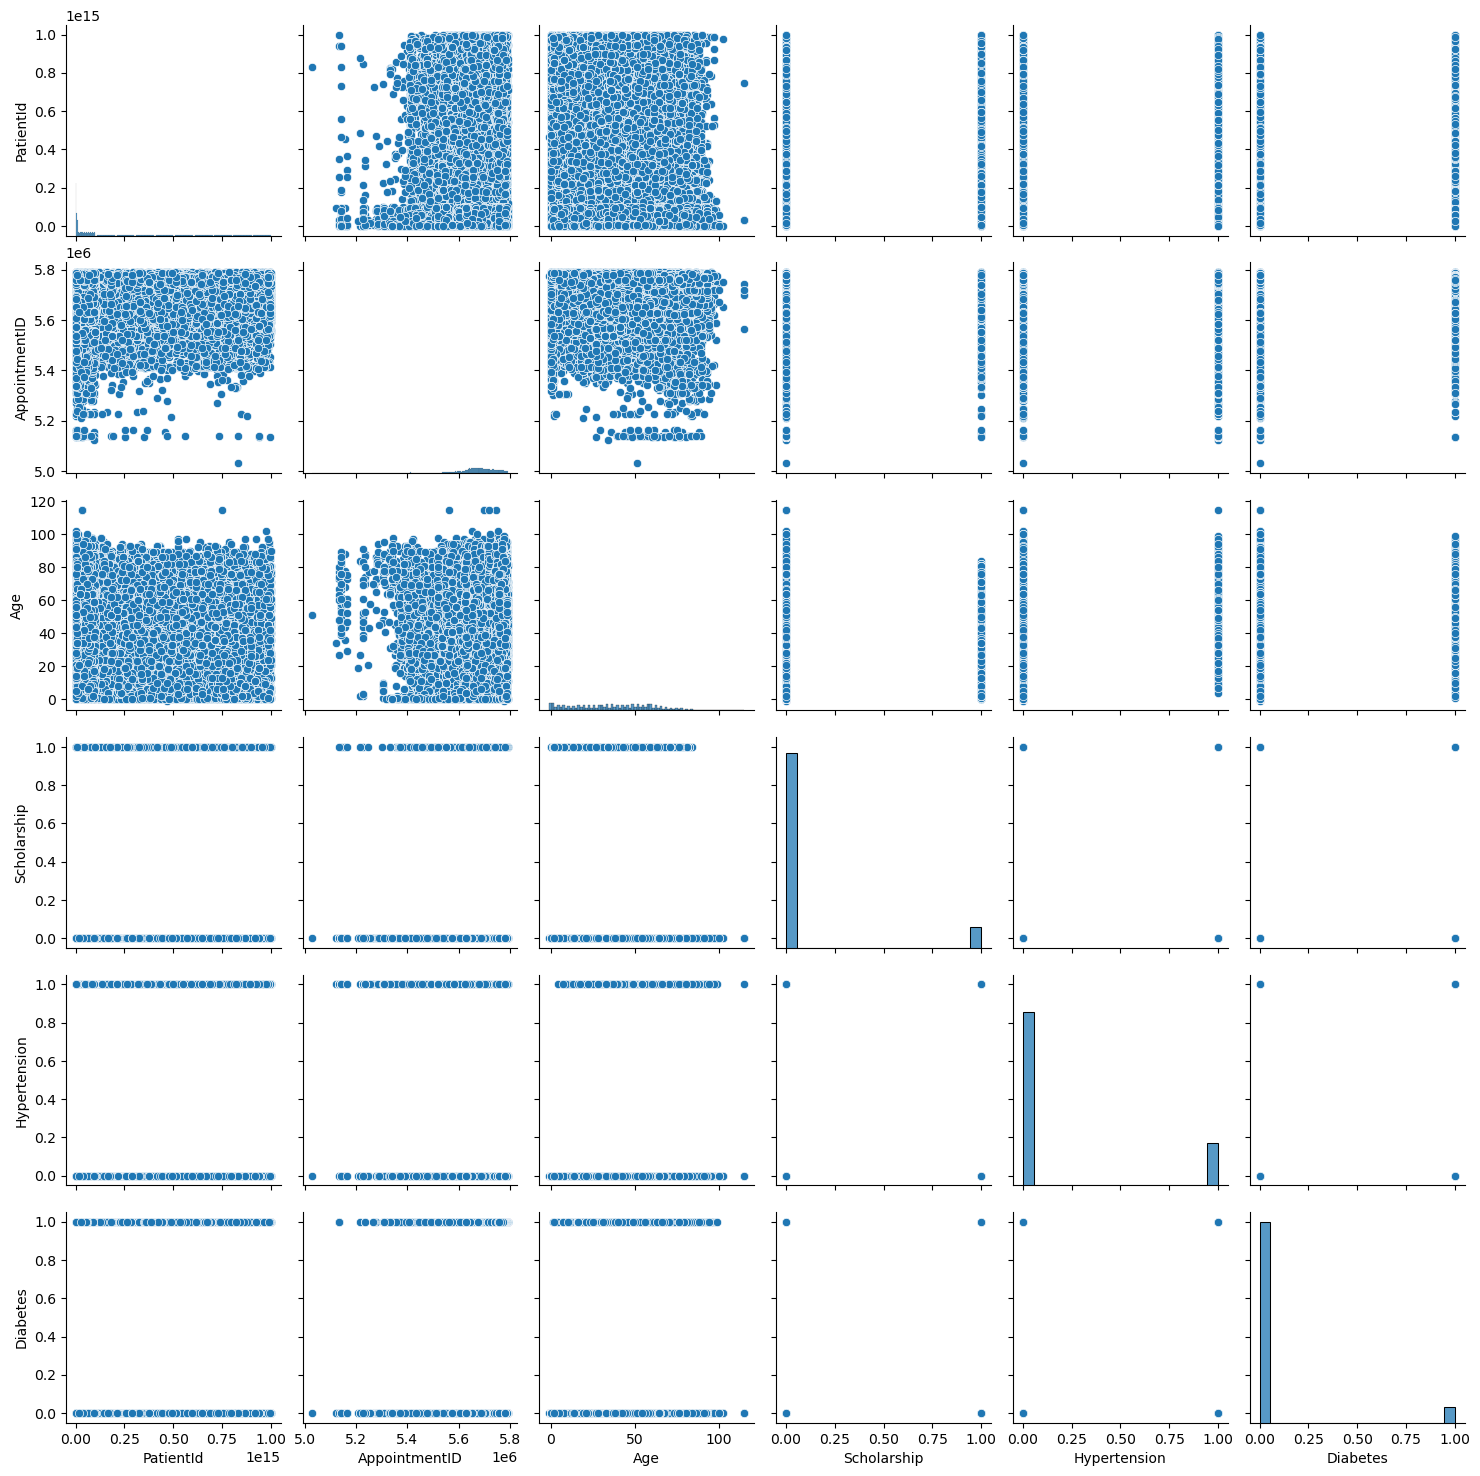

In [24]:
sns.pairplot(data=base_data.iloc[:,0:10],)

In [25]:
sns.pairplot(data=base_data.iloc[:,0:10],hue='Gender')


In [ ]:
sns.countplot(data=base_data,x='Age',hue="Gender")
plt.xticks(ticks=list(map(lambda x: x*5,  range(1,18))))

In [ ]:
lst = list(map(lambda x: x*5,  range(1,18))) 
lst